## Negative feedback regulation
#### *Alexandros Papagiannakis, PhD, HHMI at Stanford University (Feb 2025)*

<ul style="font-size:25px";> Lets create a simple mathematical model with negative feedback </ul>
<img src="Negative_feedback.png" align="center" width="400"/>

\begin{align}
\frac{dA}{dT} &= \alpha_{A} - \beta_{A} - \gamma_{BA}B
\end{align}

\begin{align}
\frac{dB}{dT} &= \alpha_{B} - \beta_{B} + \gamma_{AB}A
\end{align}

<br> $\alpha$ : native expression rate
<br> $\beta$ : degradation rate
<br> $\gamma$ : activation/inhibition strength from A to B (AB) or from B to A (BA) respecrively



In [305]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp


def negative_feedback_ode(t, y, alpha_A, alpha_B, beta_A, beta_B, gamma_BA, gamma_AB):
    A, B = y
    dA_dt = alpha_A - beta_A * A - gamma_BA * B
    dB_dt = alpha_B - beta_B * B + gamma_AB * A
    
    return [dA_dt, dB_dt]

# Parameters
alpha_A = 3.5
alpha_B = 0.0001
beta_A = 0.01
beta_B = 0.01
gamma_BA = 0.125
gamma_AB = 0.012

# Initial conditions
A0 = 5  # Initial concentration of A
B0 = 5  # Initial concentration of B
y0 = [A0, B0]

# Time points
t_span = (0, 600)
t_eval = np.linspace(t_span[0], t_span[1], 100000)

# Integrate the ODEs
solution = solve_ivp(negative_feedback_ode, t_span, y0, t_eval=t_eval, args=(alpha_A, alpha_B, beta_A, beta_B, gamma_BA, gamma_AB), method='RK45', atol=1e-6, rtol=1e-6)

gene_A = solution.y[0]
gene_B = solution.y[1]
time = solution.t



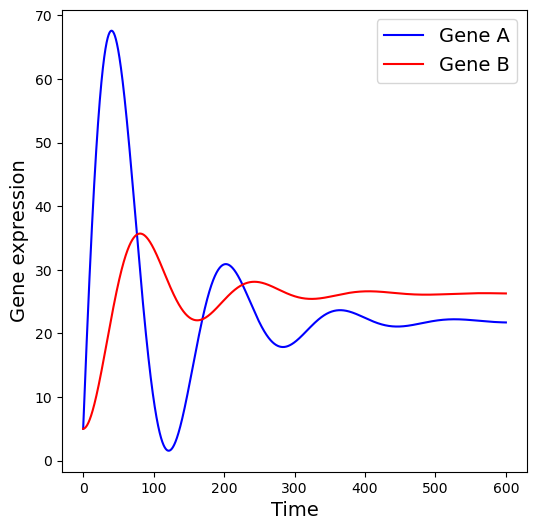

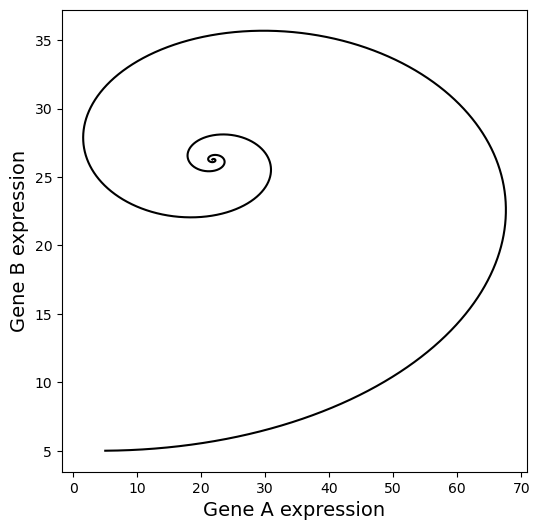

In [306]:
# Plot the results
plt.figure(figsize=(6, 6))
plt.plot(time, gene_A, label="Gene A", color='b')
plt.plot(time, gene_B, label="Gene B", color='r')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Gene expression', fontsize=14)
plt.legend(fontsize=14)
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(gene_A, gene_B, 'k')
plt.xlabel('Gene A expression', fontsize=14)
plt.ylabel('Gene B expression', fontsize=14)
plt.show()